# Topic Modeling

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from top2vec import Top2Vec
import sys
sys.path.append('/Users/jessicahassibi/PycharmProjects/bachelor-thesis/src/data')
import data_helpers
import nlp
from importlib import reload
reload(data_helpers)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessicahassibi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<module 'data_helpers' from '/Users/jessicahassibi/PycharmProjects/bachelor-thesis/src/data/data_helpers.py'>

## Method 1: Top2Vec

In [4]:
languages = ["de", "en", "es", "it", "ar", "fr"]

In [5]:
multilingual_documents = data_helpers.get_documents_list(languages)

Recommended for multilingual datasets: 'distiluse-base-multilingual-cased' (pre-trained sentence transformer)
- no specified will use doc2vec method -> not multilingual

Top2Vec: no need to remove stop words

In [6]:
multilingual_documents[101]

'Georg Bernhard Tintner (22. Mai 1917 in Wien – 2. Oktober 1999 in Halifax, Kanada) war ein österreichischer Komponist und Dirigent, der 1946 die neuseeländische Staatsbürgerschaft annahm.'

### Parameter:
- ngram_vocab: True allows bigrams (no trigrams etc.!)
- min_count: ignore words with smaller total count
- verbose: True to print status duri training

In [7]:
top2vec_model = Top2Vec(multilingual_documents, verbose=True, min_count=10, ngram_vocab=True, embedding_model='distiluse-base-multilingual-cased')
top2vec_model.save("../models/topic_modeling/Top2Vec_multilingual")

2022-09-10 20:23:26,749 - top2vec - INFO - Pre-processing documents for training
2022-09-10 20:23:27,102 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2022-09-10 20:23:29,202 - top2vec - INFO - Creating joint document/word embedding
2022-09-10 20:26:43,880 - top2vec - INFO - Creating lower dimension embedding of documents
2022-09-10 20:26:48,938 - top2vec - INFO - Finding dense areas of documents
2022-09-10 20:26:48,967 - top2vec - INFO - Finding topics


In [8]:
top2vec_model = Top2Vec.load("../models/topic_modeling/Top2Vec_multilingual")

In [9]:
top2vec_model.get_num_topics()

2

In [10]:
bigrams = []
for word in top2vec_model.vocab:
    if len(word.split()) == 2:
        bigrams.append(word)
bigrams

['juni in',
 'september in',
 'war ein',
 'deutscher komponist',
 'vor allem',
 'wurde er',
 'zu den',
 'dirigent und',
 'mai in',
 'november in',
 'dezember in',
 'und dirigent',
 'unter anderem',
 'juli in',
 'august in',
 'februar in',
 'der ddr',
 'frankfurt am',
 'ebenda war',
 'ein deutscher',
 'komponist und',
 'professor fur',
 'an der',
 'april in',
 'und hochschullehrer',
 'ist der',
 'us amerikanischer',
 'gottfried muller',
 'fur die',
 'carl orff',
 'carmina burana',
 'des jahrhunderts',
 'als einer',
 'januar in',
 'oktober in',
 'tel aviv',
 'israelischer komponist',
 'osterreich ungarn',
 'nach der',
 'des zweiten',
 'zweiten weltkrieg',
 'die sowjetunion',
 'alexander von',
 'marz in',
 'new york',
 'schriftsteller und',
 'alexandre tansman',
 'russisches kaiserreich',
 'budapest osterreich',
 'los angeles',
 'einer der',
 'auf die',
 'mit der',
 'von bis',
 'hanns eisler',
 'antal dorati',
 'den usa',
 'der musik',
 'anton webern',
 'von webern',
 'arnold schonberg',


In [11]:
words, word_scores = top2vec_model.similar_words(keywords=["Schoenberg"], keywords_neg=[], num_words=20) 
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

schonberg 0.8789182910434017
fitelberg 0.8575633623396246
grzegorz fitelberg 0.7697791900455137
rosenberg 0.7505863701165174
lemberg 0.7450240455351054
rosenberg err 0.7419467159301005
salzburg 0.7282399173498251
arnold schoenberg 0.7222844299833705
frederick 0.7086217713446478
schulhoff 0.7014516955051362
fritz 0.6767010522055235
hamburg 0.6677944139442169
leibowitz 0.6628771785799432
schnabel 0.6520129746211508
arnold schonberg 0.6501298757311247
werner 0.6479105965186455
شوينبيرج 0.6477315782262772
siegfried 0.640864365589467
wiener 0.6400138172819045
bernhard 0.6383572168306233


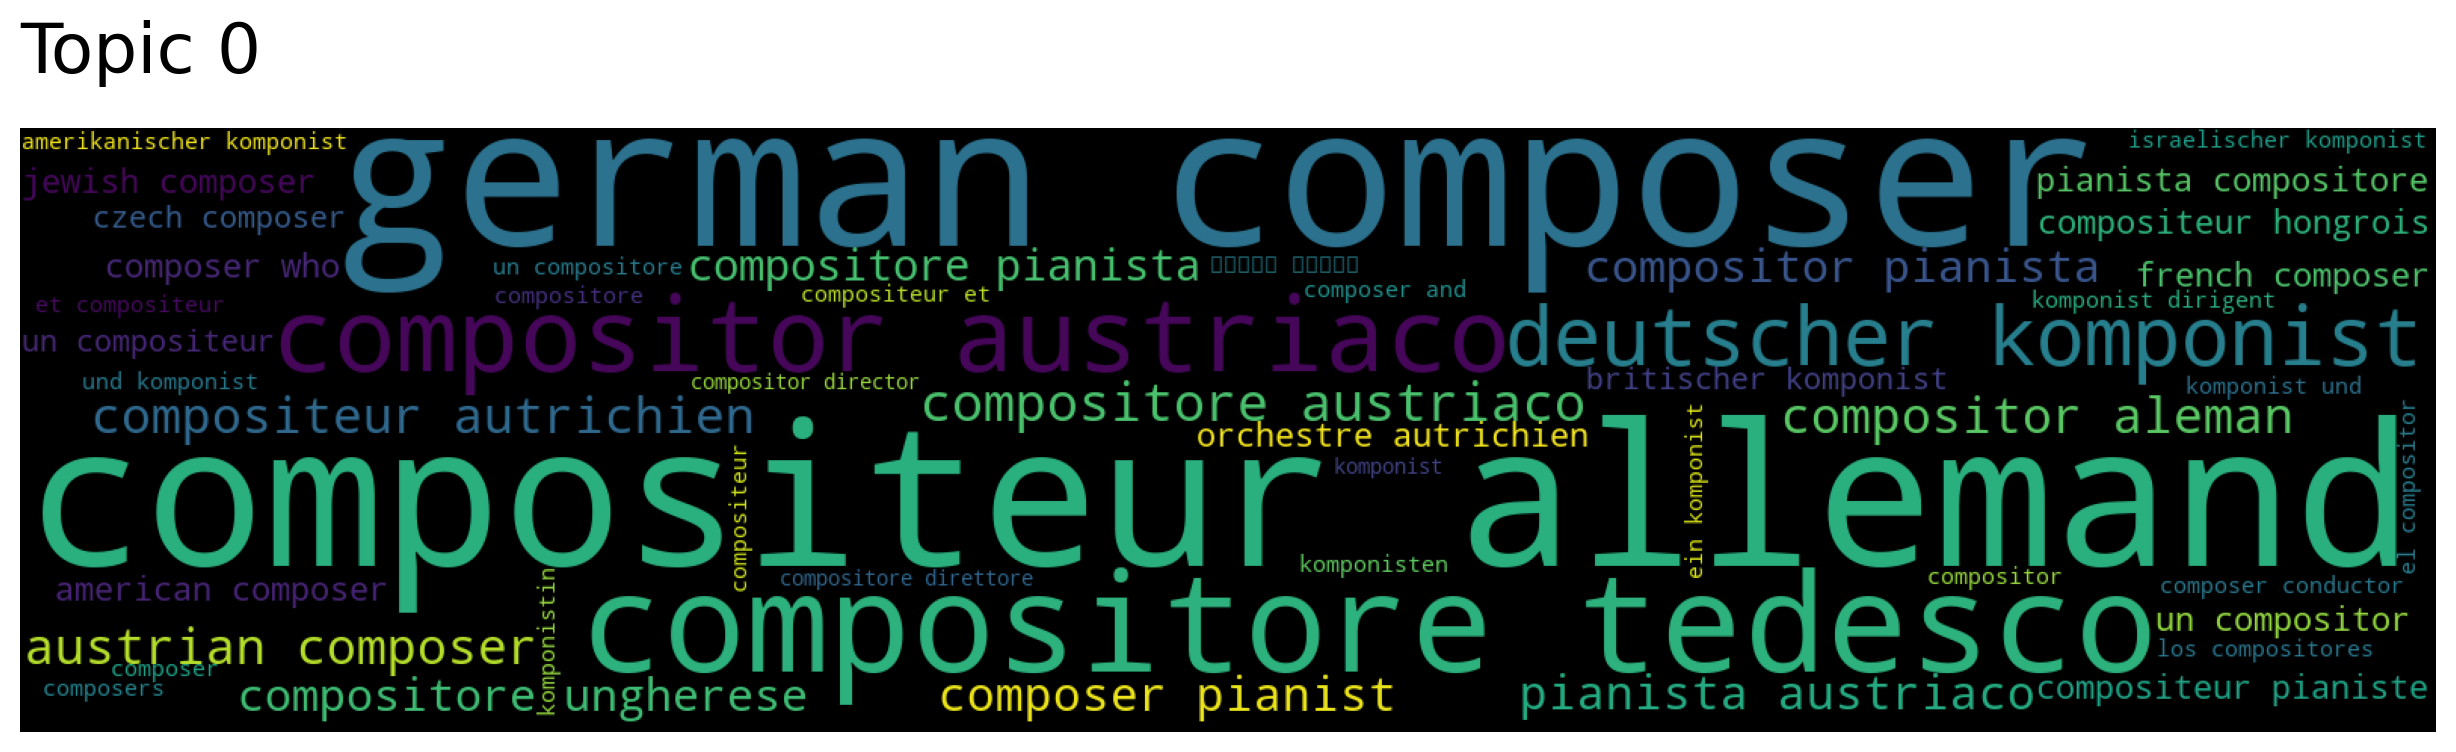

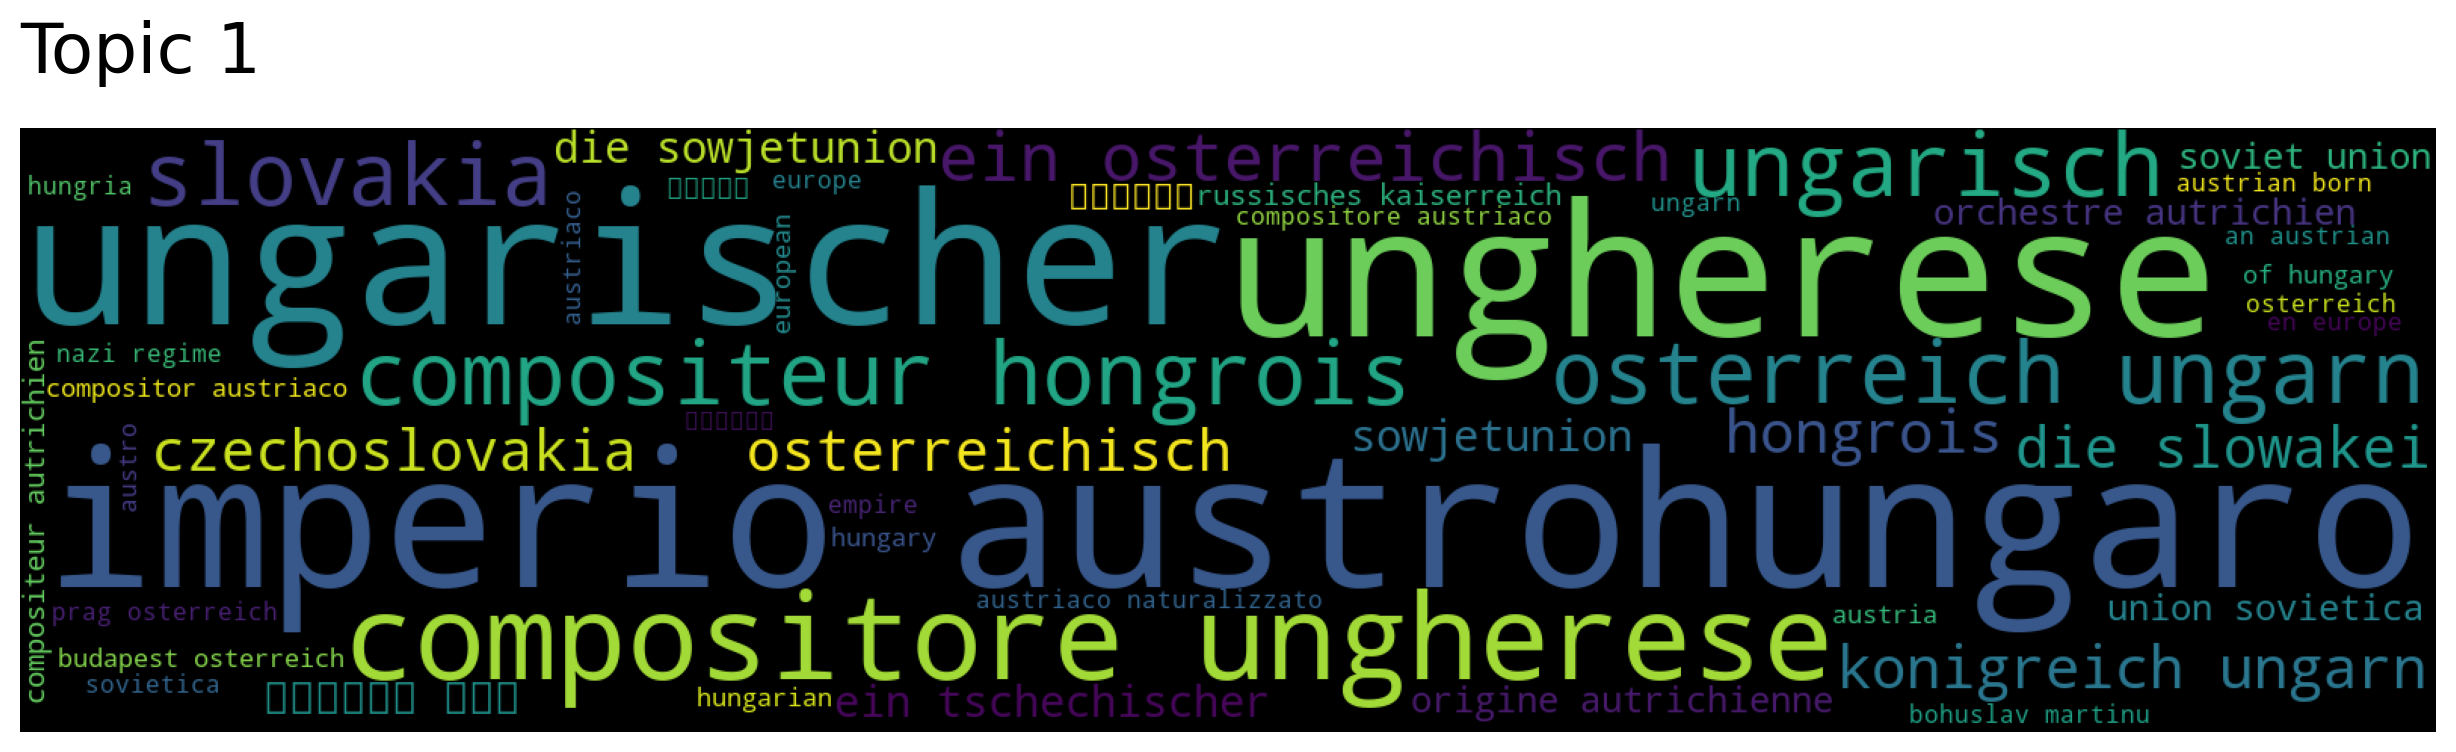

In [12]:
for topic in range(top2vec_model.get_num_topics()):
    top2vec_model.generate_topic_wordcloud(topic)

## Method 2: BERTopic

In [13]:
# Train model on documents with mixed languages

# merge stopwords for each language
stop_words = nlp.get_stop_words(languages)

In [14]:
# language="multilingual" results in using sentence-transformers model "paraphrase-multilingual-MiniLM-L12-v2"
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)
topic_model = BERTopic(verbose=True, language="multilingual", vectorizer_model=vectorizer_model) # use min_topic_size=40 for less topics
topics, probs = topic_model.fit_transform(multilingual_documents)
topic_model.save("../models/topic_modeling/BERTopic_multilingual")

# Update topic representations to try different parameters
#topic_model.update_topics(multilingual_documents, topics, vectorizer_model=cv)

Batches:   0%|          | 0/30 [00:00<?, ?it/s]

2022-09-10 20:29:39,988 - BERTopic - Transformed documents to Embeddings
2022-09-10 20:29:41,983 - BERTopic - Reduced dimensionality
2022-09-10 20:29:42,020 - BERTopic - Clustered reduced embeddings


In [15]:
topic_model = BERTopic.load("../models/topic_modeling/BERTopic_multilingual")

In [16]:
topic_model.get_topic_info()

Topic  Count                                              Name
0      -1    199                -1_music_composer_komponist_jewish
1       0     78                    0_strauss_11_rosenthal_richard
2       1     71                        1_koppel_kreisler_29_kaper
3       2     62               2_fried_deutscher_komponist_tintner
4       3     43               3_schnabel_شوينبيرج_schoenberg_1951
5       4     33                       4_karel_leibowitz_17_reiner
6       5     30                     5_weiner_weigl_weinberg_weill
7       6     29             6_dauber_hollaender_robert dauber_dol
8       7     28                   7_steuermann_stekel_grenoble_11
9       8     28                      8_deutsch_22_max_max deutsch
10      9     27                              9_bartók_25_béla_new
11     10     25                    10_zipper_trapp_berlin_wetzler
12     11     23                     11_jessel_roman_hindemith_عام
13     12     22            12_pisk_riesenfeld_angeles_paumgartner
14     13     22                         13_ben_haim_ben haim_aviv
15     14     21  14_ullmann_auschwitz_auschwitz birkenau_birkenau
16     15     20             15_szell_szpilman_cleveland_fitelberg
17     16     19                  16_eisler_egk_hanns_hanns eisler
18     17     17                    17_horthy_hungary_1918_hongrie
19     18     17               18_waldau_salo_translateur_majdanek
20     19     16                     19_1945_guerra_hitler_germany
21     20     14                        20_waxman_24_franz_angeles
22     21     14                               21_1886_kahn_may_21
23     22     13                     22_nazi_entartete_musik_kunst
24     23     13            23_soas_university_universität_ranking
25     24     12              24_الموسيقى_musicale_musical_musiker
26     25     12                     25_gold_ernest gold_17_ernest
27     26     12                 26_antal_doráti_egon_antal doráti
28     27     12                        27_van_gilse_van gilse_jan
29     28     10             28_leni alexander_leni_alexander_2005

In [17]:
topic_model.visualize_topics()

In [24]:
topic_model.transform("Schönberg")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

([-1], array([0.]))

In [22]:
for i in range(len(topic_model.get_topic_info())):
    print(f"Thema {i-1}")
    list = topic_model.get_topic(i-1)
    for elem in list:
        print(elem)
    print()

Thema -1
('music', 0.004958134464517591)
('berlin', 0.004338352463945566)
('piano', 0.003490212004282188)
('wurde', 0.0034660766118031205)
('musik', 0.0033159749441232732)
('orchestra', 0.0032636213368839513)
('new', 0.003141348420617237)
('op', 0.002949766252182159)
('opera', 0.0028769247093652344)
('york', 0.0026699389587629503)

Thema 0
('isbn', 0.02781432008803656)
('band', 0.014758846036074795)
('978', 0.014356973609935387)
('isbn 978', 0.014319433694743)
('hrsg', 0.013961856731642935)
('verlag', 0.012460920173730768)
('wien', 0.01136472293934458)
('musik', 0.008605700282999694)
('berlin', 0.007409439565327329)
('frankfurt main', 0.007320895030142274)

Thema 1
('komponist', 0.022684087248598064)
('compositeur', 0.016016673924323016)
('né', 0.015290578132783719)
('mort', 0.014571850738036797)
('österreichischer', 0.01381741213472805)
('composer', 0.012643006491529557)
('april', 0.012468670070340056)
('deutscher', 0.011417536007986206)
('pianist', 0.01130729374545125)
('autrichien',